<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## ImageDataset base class

In [1]:
#| echo: false
#| output: asis
show_doc(ImageDataset)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/image/datasets.py#L20){target="_blank" style="float:right; font-size:smaller"}

### ImageDataset

>      ImageDataset ()

Base class for image datasets providing visualization of (image, label) samples

## MNIST

### MNIST dataset

In [2]:
#| echo: false
#| output: asis
show_doc(MNISTDataset)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/image/datasets.py#L57){target="_blank" style="float:right; font-size:smaller"}

### MNISTDataset

>      MNISTDataset (data_dir:str='~/Data', train=True, transform:<module'torchv
>                    ision.transforms.transforms'from'/home/syl20/anaconda3/envs
>                    /nimrod/lib/python3.9/site-
>                    packages/torchvision/transforms/transforms.py'>=ToTensor())

MNIST digit dataset

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| data_dir | str | ~/Data | path where data is saved |
| train | bool | True | train or test dataset |
| transform | torchvision.transforms.transforms | ToTensor() | data formatting |

### Usage

Number of samples in the dataset: 10000
torch.Size([1, 28, 28]) 7 torch.FloatTensor


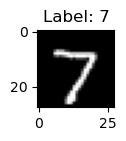

In [ ]:
ds = MNISTDataset('~/Data', train=False)
print(f"Number of samples in the dataset: {len(ds)}")
X, y = ds[0]
print(X.shape, y, X.type())
ds.show_idx(0)
train, dev = ds.train_dev_split(0.8)

### MNIST DataModule

In [3]:
#| echo: false
#| output: asis
show_doc(MNISTDataModule)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/image/datasets.py#L99){target="_blank" style="float:right; font-size:smaller"}

### MNISTDataModule

>      MNISTDataModule (data_dir:str='~/Data/',
>                       train_val_test_split:List[float]=[0.8, 0.1, 0.1],
>                       batch_size:int=64, num_workers:int=0,
>                       pin_memory:bool=False)

A DataModule standardizes the training, val, test splits, data preparation and transforms. The main
advantage is consistent data splits, data preparation and transforms across models.

Example::

    class MyDataModule(LightningDataModule):
        def __init__(self):
            super().__init__()
        def prepare_data(self):
            # download, split, etc...
            # only called on 1 GPU/TPU in distributed
        def setup(self, stage):
            # make assignments here (val/train/test split)
            # called on every process in DDP
        def train_dataloader(self):
            train_split = Dataset(...)
            return DataLoader(train_split)
        def val_dataloader(self):
            val_split = Dataset(...)
            return DataLoader(val_split)
        def test_dataloader(self):
            test_split = Dataset(...)
            return DataLoader(test_split)
        def teardown(self):
            # clean up after fit or test
            # called on every process in DDP

### Usage

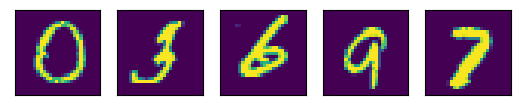

In [ ]:
dm = MNISTDataModule(
    data_dir="~/Data/",train_val_test_split=[0.8, 0.1, 0.1],
    batch_size = 64,
    num_workers = 0,
    pin_memory= False
)
dm.prepare_data()
dm.setup()
test_dl = dm.test_dataloader()
len(dm.data_test[0])
imgs = [dm.data_test[i][0] for i in range(5)]
ImageDataset.show_grid(imgs)